In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from meus.printer import *
from datetime import datetime
import matplotlib.pyplot as plt

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-4-10'

In [2]:
os.chdir('D:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> caso-full.csv
1 -> cities.csv
2 -> covid19_municipios.csv
3 -> COVID19_REGIOES BR.csv
4 -> Dados_demográficos_municípios.xlsx
5 -> Datalab_COVID.pptx
6 -> figures
7 -> População residente municipal x população faixa etária.csv
8 -> População residente por estado - 2015.csv
9 -> População residente x sexo.csv
10 -> results


In [3]:
date = 0
df =  pd.read_csv('..\\'+directory[date])
df.tail()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
10246,Águas de Lindóia,3500501.0,2020-04-10,18705.0,True,False,1,5.34616,2020-04-09,1.0,1.0,city,SP,0,0
10247,Araguaína,1702109.0,2020-04-10,180470.0,True,False,6,3.32465,2020-04-09,NaN,0.0,city,TO,0,0
10248,Dianópolis,1707009.0,2020-04-10,22139.0,True,False,1,4.51692,2020-04-09,NaN,0.0,city,TO,0,0
10249,Gurupi,1709500.0,2020-04-10,86647.0,True,False,1,1.15411,2020-04-09,NaN,0.0,city,TO,0,0
10250,Palmas,1721000.0,2020-04-10,299127.0,True,False,15,5.01459,2020-04-09,NaN,0.0,city,TO,0,0


In [4]:
df_cities = pd.DataFrame()
g_population = df.groupby('city')
df_cities['City'] = g_population.sum().index
df_cities['Population'] = g_population['estimated_population_2019'].median().values
df_cities['Confirmed'] = g_population['last_available_confirmed'].sum().values
df_cities['Deaths'] = g_population['last_available_deaths'].sum().values
df_cities['Confirmed/100k'] = g_population['last_available_confirmed_per_100k_inhabitants'].sum().values
df_cities['Death rate'] = g_population['last_available_death_rate'].sum().values
df = df_cities
df.head()

,City,Population,Confirmed,Deaths,Confirmed/100k,Death rate
0,Abaetetuba,157698.0,15,0.0,9.51184,0.0
1,Abaiara,11737.0,7,0.0,59.64042,0.0
2,Abreu e Lima,99990.0,2,0.0,2.00020,0.0
3,Acrelândia,15256.0,103,0.0,675.14418,0.0
4,Adamantina,35068.0,2,0.0,5.70320,0.0


In [5]:
# df = df[(df['date'] == '2020-04-10') & (df['place_type'] == 'city')][["estimated_population_2019", "confirmed", "deaths", "confirmed_per_100k_inhabitants", "death_rate", "city"]]
# df = df.rename(columns={
#     "estimated_population_2019": "Population",
#     "confirmed": "Confirmed",
#     "deaths": "Deaths",
#     "confirmed_per_100k_inhabitants": "Confirmed/100k",
#     "death_rate": "Death Rate",
#     "city": "City"
# })
# df.info()

In [6]:
df['City'].to_csv('cities.csv', header=['City'])

In [7]:
g = 1
print_campo = 's'
col1 = 'Population'
col2 = 'Confirmed'
try:
    os.mkdir(col2)
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory created


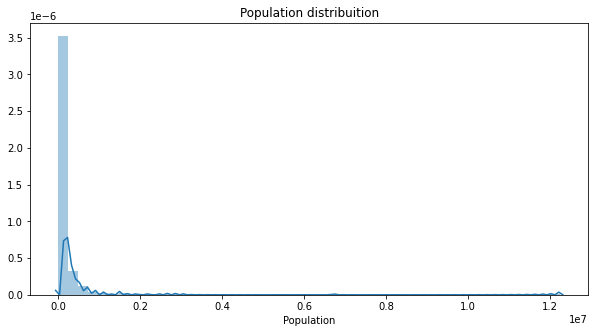

In [8]:
g += 1
plt.figure(figsize=(10, 5))
sns.distplot(
    df[col1].dropna()
)
plt.title(col1 + ' distribuition')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

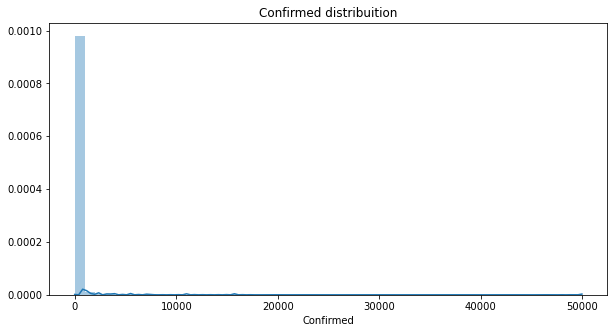

In [9]:
g += 1
plt.figure(figsize=(10, 5))
sns.distplot(
    df[col2].dropna()
)
plt.title(col2 + ' distribuition')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

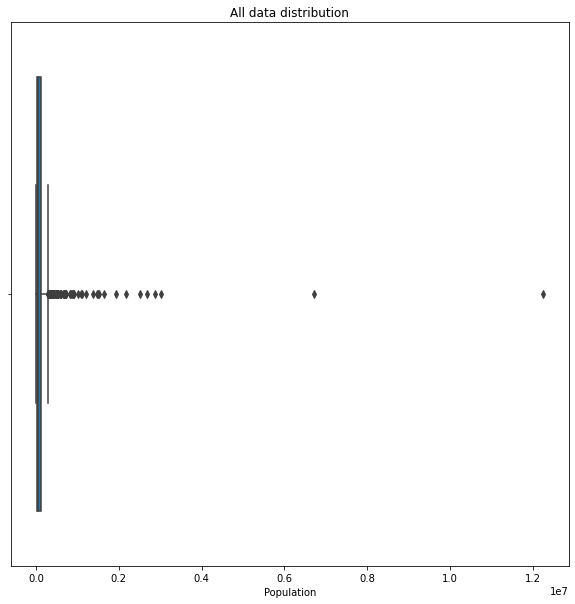

In [10]:
g += 1
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=col1,
    data=df
)
plt.title('All data distribution')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

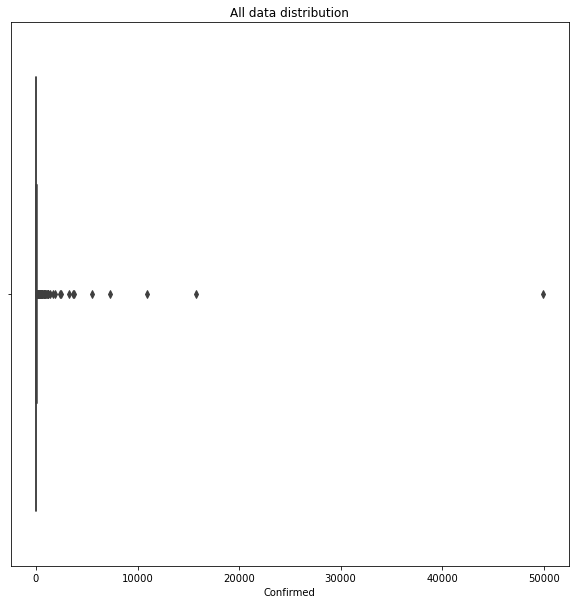

In [11]:
g += 1
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=col2,
    data=df
)
plt.title('All data distribution')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

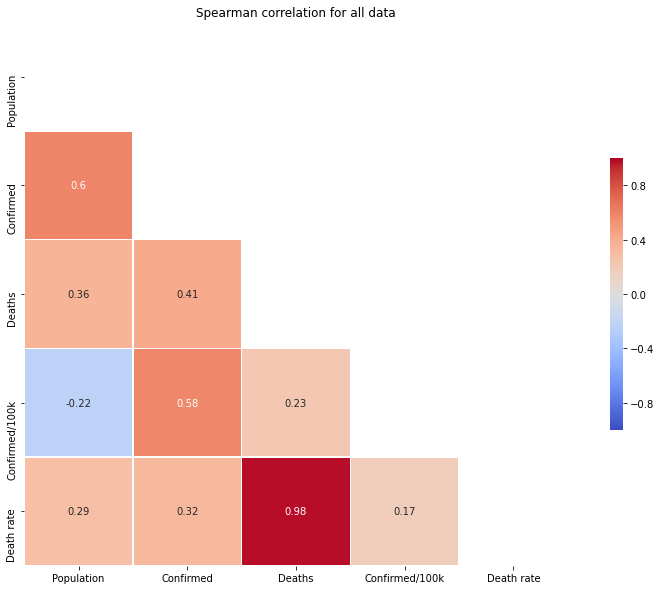

In [12]:
g += 1
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.title('Spearman correlation for all data')
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

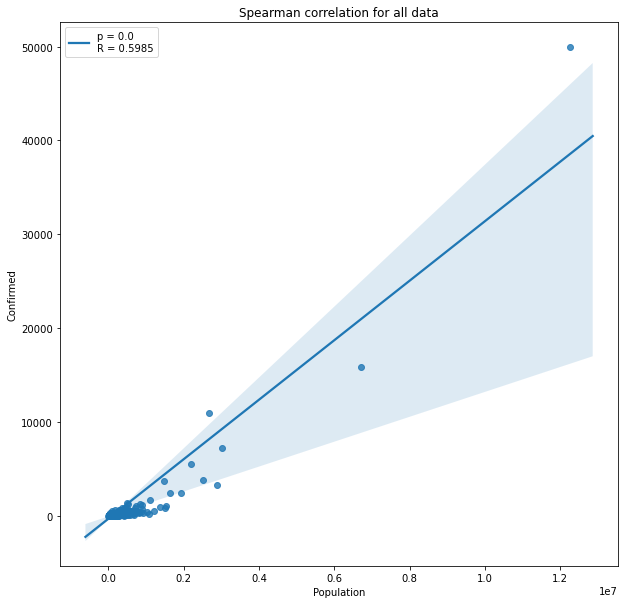

In [13]:
g += 1
df_mold = df.dropna()
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

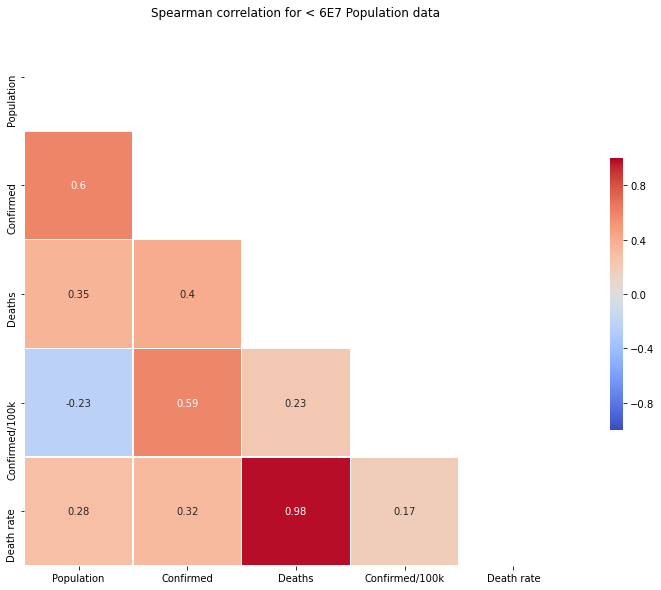

In [14]:
g += 1
df_mod = df[df['Population'] < 6000000]
corr = df_mod.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.title('Spearman correlation for < 6E7 '+col1+' data')
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

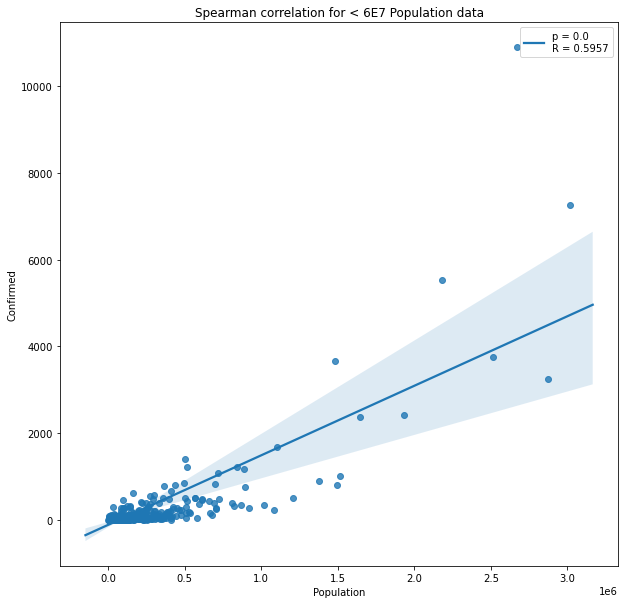

In [15]:
g += 1
df_mold = df_mod
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for < 6E7 '+col1+' data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

In [16]:
minimus = df[col1].min()
maximus = df[col1].max()
q2 = df[col1].median()
q1 = df[df[col1] < q2][col1].median()
q3 = df[df[col1] > q2][col1].median()
qi = q3 - q1
minor = q1 - (qi * 1.5)
major = q3 + (qi * 1.5)
list_quartil = {
    'minimus': minimus,
    'minor': minor,
    'q1': q1,
    'q2': q2,
    'q3': q3,
    'major': major,
    'maximus': maximus,
    'qi': qi
}
for k, v in list_quartil.items():
    print(f'{k} - {v}')

minimus - 1149.0
minor - -140848.0
q1 - 23286.5
q2 - 56428.0
q3 - 132709.5
major - 296844.0
maximus - 12252023.0
qi - 109423.0


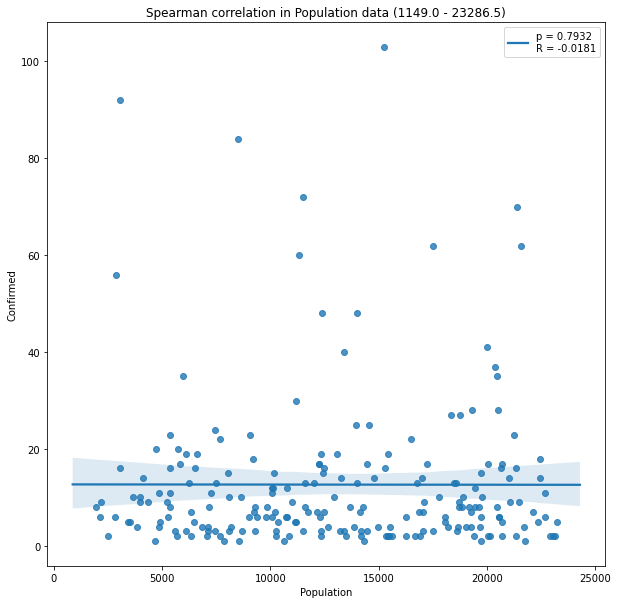

In [17]:
g += 1
inic = minimus
end = q1
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

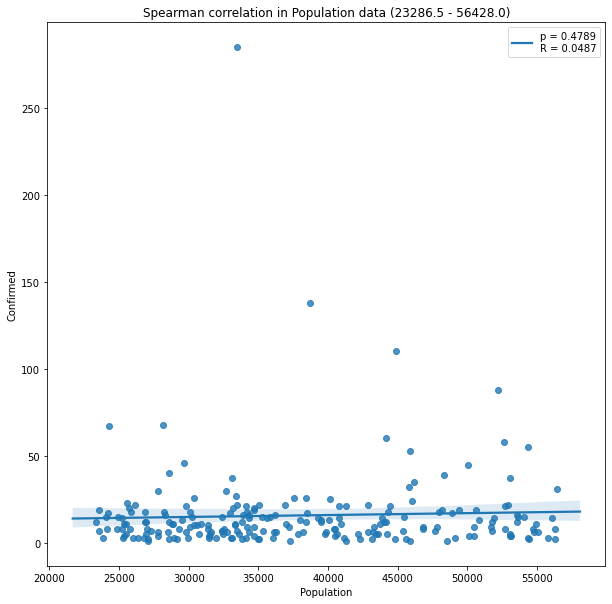

In [18]:
g += 1
inic = q1
end = q2
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

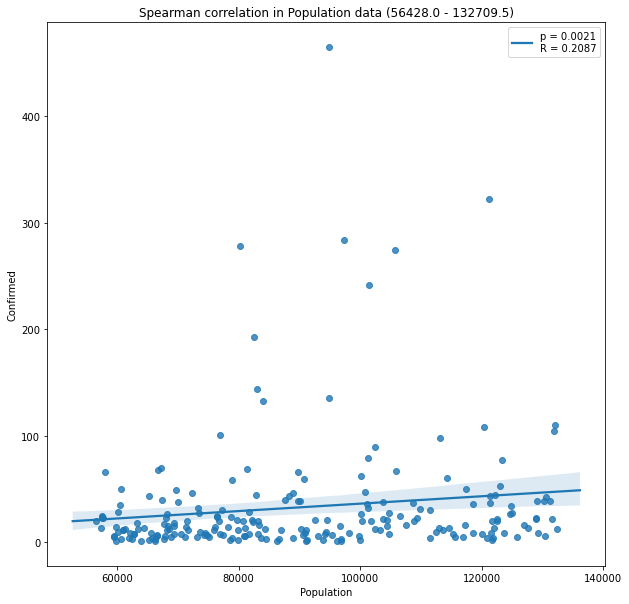

In [19]:
g += 1
inic = q2
end = q3
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

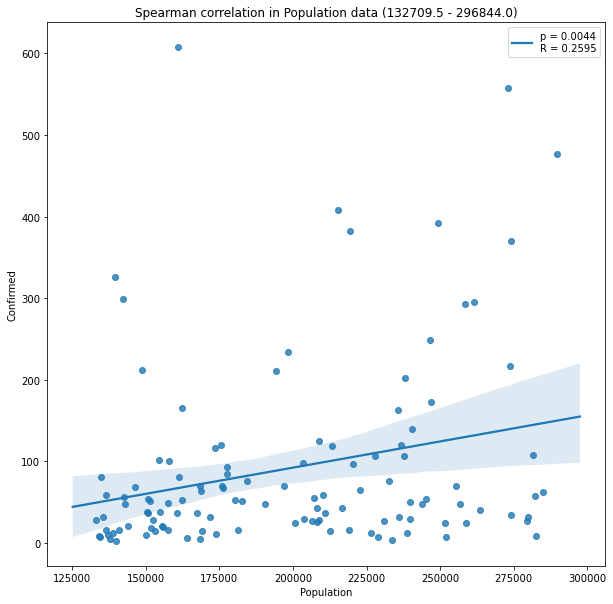

In [20]:
g += 1
inic = q3
end = major
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

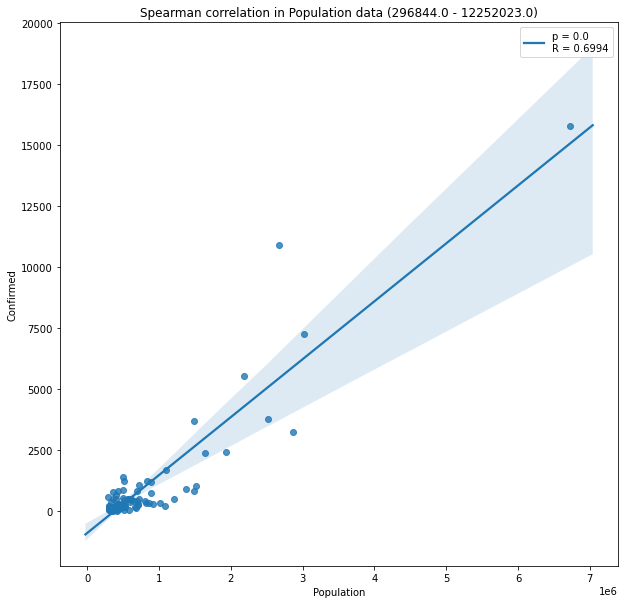

In [21]:
g += 1
inic = major
end = maximus
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)